# Лабораторная 1

## Выполнил студент группы 17-АСв Дыдыкина О.В.
 
<b>Цель лабораторной работы</b> – получение навыков работы с библиотеками анализа данных, предварительной обработки данных, средствами визуализации.
<b>Задание:</b> 7 вариант - Камеры:  
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
3. Постройте график изменения средней цены на камеры по годам.
4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.
5. Добавьте в набор данных признак, являющийся произведением двух других признаков.
6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.
7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.
8. Определите год, в который было выпущено максимально количество новых камер.



In [21]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from scipy import stats

file = pd.read_csv("camera_dataset.csv", ",")
file

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,STRING,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE,DOUBLE
1,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
2,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
3,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
4,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1035,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1036,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1037,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


Проверяем, все ли столбцы содержат данные нужного формата:

In [22]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Model                    1039 non-null   object
 1   Release date             1039 non-null   object
 2   Max resolution           1039 non-null   object
 3   Low resolution           1039 non-null   object
 4   Effective pixels         1039 non-null   object
 5   Zoom wide (W)            1039 non-null   object
 6   Zoom tele (T)            1039 non-null   object
 7   Normal focus range       1039 non-null   object
 8   Macro focus range        1038 non-null   object
 9   Storage included         1037 non-null   object
 10  Weight (inc. batteries)  1037 non-null   object
 11  Dimensions               1037 non-null   object
 12  Price                    1039 non-null   object
dtypes: object(13)
memory usage: 52.8+ KB


Так как в таблице все записи типа object(смешанный), необходимо сделать преобразование к нужным числовым типам:

In [23]:
file = file.drop([0])
file["Release date"] = file["Release date"].astype("int")
file["Max resolution"] = file["Max resolution"].astype("double")
file["Low resolution"] = file["Low resolution"].astype("double")
file["Effective pixels"] = file["Effective pixels"].astype("double")
file["Zoom wide (W)"] = file["Zoom wide (W)"].astype("double")
file["Zoom tele (T)"] = file["Zoom tele (T)"].astype("double")
file["Normal focus range"] = file["Normal focus range"].astype("double")
file["Macro focus range"] = file["Macro focus range"].astype("double")
file["Storage included"] = file["Storage included"].astype("double")
file["Weight (inc. batteries)"] = file["Weight (inc. batteries)"].astype("double")
file["Dimensions"] = file["Dimensions"].astype("double")
file["Price"] = file["Price"].astype("double")

6. <b>Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.</b>

In [24]:
print("Число записей в таблице до удаления: {0}".format(file.shape[0]))
new_copy_file = file.copy()
new_copy_file.replace(0.0, np.nan, inplace = True)
new_copy_file.dropna(inplace = True)
print("Число записей в таблице после удаления: {0}".format(new_copy_file.shape[0]))

Число записей в таблице до удаления: 1038
Число записей в таблице после удаления: 773


In [ ]:
Я удалил все нулевые строки сразу, в надежде в дальнейшем уменьшить время выполнения операций 

1. <b>Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.</b>

Визуализация будет создаваться с помощью библиотеки <b>seaborn</b>, так как в ней удобно строить такого рода таблицы. Таблица будет представлять из себя зависимость <b>средней цены</b> и <b>максимального разрешения</b> камер в этот же период за 11 лет.

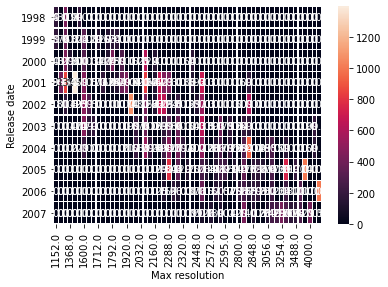

In [25]:
table = new_copy_file.pivot_table(index = "Release date",
                        columns = "Max resolution",
                        values = "Price",
                        aggfunc = "mean").fillna(0).applymap(float)
sns.heatmap(table, annot=True, fmt=".1f", linewidths=.10)

Из таблицы можно увидеть в каком году были выпущены в продажу камеры с той или иной разрешающей способностью.<br><br>
Можно сделать вывод, что камеры с каждым годом становятся всё более продвинутыми, а их цена снижается, но при этом она растёт в зависимости от разрешающей способности.

2. <b>Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.</b>

In [26]:
kor_max = new_copy_file["Price"].corr(new_copy_file["Max resolution"])
kor_min = new_copy_file["Price"].corr(new_copy_file["Low resolution"])
kor_Pearson = stats.pearsonr(new_copy_file["Price"], new_copy_file["Max resolution"])
print("Критерий Пирсона: {0}. P-значение: {1};".format(kor_Pearson[0], kor_Pearson[1]))

kor_Spearman = stats.spearmanr(new_copy_file["Price"],new_copy_file["Max resolution"], nan_policy="omit") 
print("Критерий Спирмена: {0}. P-значение: {1}".format(kor_Spearman[0], kor_Spearman[1]))

Критерий Пирсона: -0.09515661977706807. P-значение: 0.008112393983706105;
Критерий Спирмена: -0.03163061198225854. P-значение: 0.37982508301417606


При сравнении видно, что результаты различаются, но на небольшое значение. P-значение в случае с Пирсоном низкое, что говорит о том, что нулевая гипотеза - переменные линейно независимы - отвергается. Так как критерий отрицателен, то можно сказать, что величины обратно зависимы, т.е. чем выше значение одной переменной, тем ниже значение другой.

Гистограмма для Price:

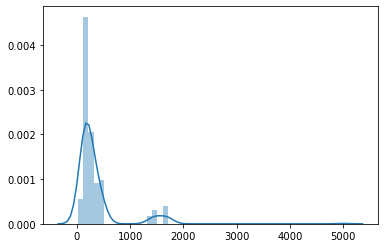

In [27]:
sns.distplot(tuple(new_copy_file["Price"].tolist()))

Гистограмма для Max resolution:

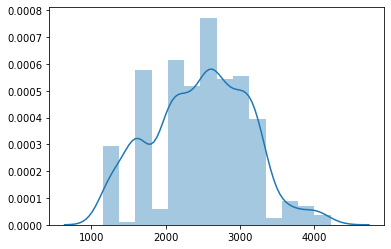

In [28]:
sns.distplot(tuple(new_copy_file["Max resolution"].tolist()))

3. <b>Постройте график изменения средней цены на камеры по годам:</b>

In [29]:
new_copy_file["Price"] = new_copy_file["Price"][1:].astype(float)
data = new_copy_file.groupby(["Release date"])["Price"].mean()
data

Release date
1998    382.533333
1999    309.818182
2000    403.400000
2001    557.972603
2002    475.042857
2003    351.538462
2004    370.840000
2005    326.981982
2006    250.741071
2007    280.038462
Name: Price, dtype: float64

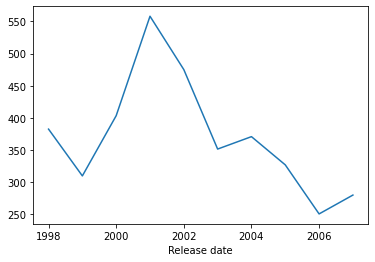

In [30]:
data.plot()

4. <b>Определите компанию, камеры которой наиболее часто встречаются в наборе данных.</b>

In [31]:
firm = new_copy_file["Model"].tolist()
firm = list(map(lambda firm: firm.split(" ")[0], list_firm))
firm
unique, pos = np.unique(firm, return_inverse=True)
counts = np.bincount(pos)
maxpos = counts.argmax()

print("Компания, камеры которой наиболее часто встречаются в наборе данных: {0} - {1} записи".format(unique[maxpos], counts[maxpos]))

Компания, камеры которой наиболее часто встречаются в наборе данных: Olympus - 102 записи


5. <b>Добавьте в набор данных признак, являющийся произведением двух других признаков.</b>

В таблицу было добавлено поле "размер фото", полученный из произведения стобцов "максимальное разрешение" и "эффективные пиксели".

In [32]:
new_copy_file["foto size"] = new_copy_file["Max resolution"] * new_copy_file["Effective pixels"]
new_copy_file

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,foto size
6,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,NaN,1600.0
10,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,1280.0
11,Canon PowerShot A100,2002,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,1280.0
12,Canon PowerShot A20,2001,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,1600.0
13,Canon PowerShot A200,2002,1600.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0,6144.0
1035,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0,6144.0
1036,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0,6144.0
1037,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0,7200.0


7. <b>Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.</b><br>
<b>С максимальной стоимостью:</b>

In [33]:
new_copy_file[new_copy_file["Price"] == new_copy_file["Price"].max()][["Model", "Price"]]

,Model,Price
826,Ricoh GR Digital,4999.0
835,Ricoh RDC-i500,4999.0


<b>С минимальной стоимостью:</b>

In [34]:
new_copy_file[new_copy_file["Price"] == new_copy_file["Price"].min()][["Model", "Price"]]

,Model,Price
348,JVC GC-QX3HD,14.0
349,JVC GC-QX5HD,14.0


8. <b>Определите год, в который было выпущено максимально количество новых камер.</b>

In [35]:
new_copy_file.groupby(["Release date", "Max resolution"])["Model"].count()

Release date  Max resolution
1998          1152.0             2
              1280.0            12
              1536.0             1
1999          1152.0             1
              1280.0            13
                                ..
2007          3264.0            40
              3296.0             4
              3488.0             2
              3648.0             9
              4000.0            10
Name: Model, Length: 129, dtype: int64

Из таблицы видно, что этот год - <b>2007</b>. 40 моделей с разрешением 3264 точек.